In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

Importamos los datos

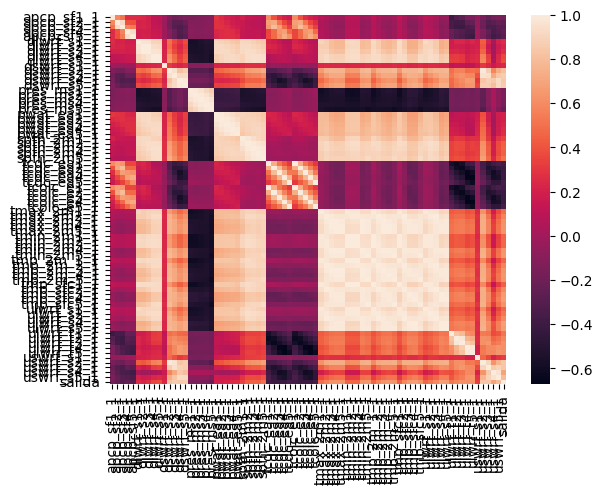

In [14]:

disp_df = pd.read_csv("datos/disp_st2ns1.txt.bz2",
    compression="bz2",
    index_col=0)
for field in disp_df:
    
    if field[-3] != "i" and int(field[-3]) != 1:
        #disp_df.drop(field, axis=1, inplace=True)
        ...
#make a correlation matrix of the dataframe and show it
corr = disp_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()


Podemos observar que las variables que mayor correlacción positiva presentan son aquellas correspondientes a la temperatura (tmax_2m1,...,tmp_sfc1) con la variable de ulwrf_t1.
corr negativa (pres_ms1 -> dlwrf_s1); (spfh_2m1 -> pres_ms1); (tmax_2m1-ulwrf_s1 -> pres_ms1); (ulwrf_t1 -> tcdc_ea1-tcolc_e1)

Dividimos los datos en los conjuntos de train y test. A su vez dividimos el conjunto de train para preparar las comparaciones entre los diferentes modelos.

In [15]:
train = disp_df.iloc[:10*365]
test_global = disp_df.iloc[10*365:]

train_x = train.iloc[:, :75]
train_y = train.iloc[:, 75]

In [ ]:
#create a dummy regressor using the median to compare
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="median")
dummy.fit(train_x, train_y)
dummy_pred = dummy.predict(X_train_validation)
#dummy MAE
dummy_mae = mean_absolute_error(Y_train_validation, dummy_pred)
print("dummy MAE: ",dummy_mae)
#dummy RMSE
dummy_rmse = np.sqrt(mean_squared_error(Y_train_validation,dummy_pred))
print("dummy RMSE: ", dummy_rmse)

Usamos KNeighborsRegressor 

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
reg = KNeighborsRegressor()
reg.fit(train_x,train_y)

X_train_validation = test_global.iloc[:, :75]
Y_train_validation = test_global.iloc[:, 75]

reg_pred = reg.predict(X_train_validation)

#compute Mean absolute error
MAE = mean_absolute_error(Y_train_validation, reg_pred)
print("model MAE: ",MAE)


RMSE = np.sqrt(mean_squared_error(Y_train_validation, reg_pred))
print("model rmse: ",RMSE)


print("model score: ", reg.score(X_train_validation, Y_train_validation))

model MAE:  2903649.9452054794
model rmse:  4003902.814587595
model score:  0.712060810881989


Procedemos a usar arboles de regresión

In [17]:
from sklearn.tree import DecisionTreeRegressor
treeREG = DecisionTreeRegressor()
treeREG.fit(train_x,train_y)
tree_pred = treeREG.predict(X_train_validation)

tree_mae = mean_absolute_error(Y_train_validation, tree_pred)
print("model MAE: ",tree_mae)

tree_rmse = np.sqrt(mean_squared_error(Y_train_validation, tree_pred))
print("model rmse: ",tree_rmse)


model MAE:  3185367.9452054794
model rmse:  4577667.856566386


Usamos regresion lineal

In [18]:
from sklearn.linear_model import LinearRegression
Li_Reg = LinearRegression()
Li_Reg.fit(train_x,train_y)
Li_pred = Li_Reg.predict(X_train_validation)

Li_mae = mean_absolute_error(Y_train_validation, Li_pred)
print("model MAE: ",Li_mae)

Li_rmse = np.sqrt(mean_squared_error(Y_train_validation, Li_pred))
print("model rmse: ",Li_rmse)

model MAE:  2242422.3671045974
model rmse:  3103586.448676004


Ajuste de hiperparámetros por búsqueda en cuadrícula

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4]}
grid = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error', 
    verbose=3,
    n_jobs=-1)

grid.fit(train_x,train_y)

#print the best score throughout the grid search
print(grid.best_score_)
#print the best parameter used for the highest score of the model.
print(grid.best_params_)

Fitting 5 folds for each of 152 candidates, totalling 760 fits
-2749124.927086654
{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
